# Modeling

The purpose of making a digital model using ML is to analyze some real world process. The analytics may be on of the following four forms:

- *Descriptive* Analytics, which tells you what happened in the past
- *Diagnostic* Analytics, which helps you understand why something happened in the past
- *Predictive* Analytics, which predicts what’s most likely to happen in the future
- *Prescriptive* Analytics, which recommends actions you can take to affect those likely outcomes



## Example: a simple four-port

Consider the following unknown four-port system:

 <img src="kuvat/fourport_unknown.svg" alt="unknown fourport" width="300"/>

The current $I$ is fed into input ports, and then some voltage $V$ is observed in output ports. To understand the process $H$ with parameters $\Theta$ better, many different currents fed and the corresponding outputs are measured. Let's assume that the results are as follows:


Text(0.5, 1.0, 'Unknown fourport')

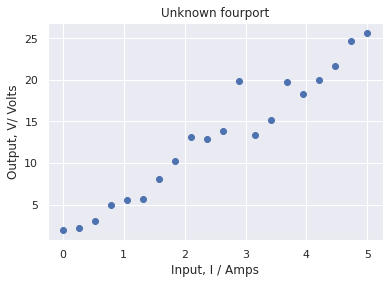

In [1]:
from snippets import fourportdata
from matplotlib import pyplot as plt
I,V=fourportdata()
plt.scatter(I,V)
plt.xlabel('Input, I / Amps')
plt.ylabel('Output, V/ Volts')
plt.title('Unknown fourport')

The data implies that there is some relationship between input and output and that relationship may be quite linear. Therefore we may try to build a linear model to predict the output for all input variable values. Since both input and output are continuous, and the model seems linear, linear regression is the first method to be tried.


Text(0.5, 1.0, 'Unknown fourport')

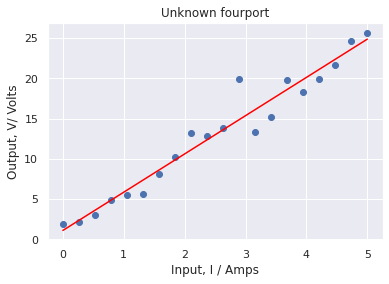

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=I.reshape(-1,1)
y=V
model = LinearRegression(
   fit_intercept = True, copy_X = True, n_jobs = 2
).fit(x,y)

x=np.linspace(0,5).reshape(-1,1)
y=model.predict(x)

plt.scatter(I,V)
plt.plot(x,y, color='red')
plt.xlabel('Input, I / Amps')
plt.ylabel('Output, V/ Volts')
plt.title('Unknown fourport')

The data has now revealed the dependency between input and output of the process. Lets take a closer look at the model parameters.

In [18]:
model.coef_, model.intercept_

(array([4.75224315]), 1.1135128864710655)

It linear model indeed fits quite well, and we may replace the original process with a linear regression, with equation:

 $ V \approx 4.8 \cdot I + 1.1 $
 

The following electric circuit would therefore be used as equivalent circuit for the previously unknown process
 
  <img src="kuvat/fourport_solved.svg" alt="unknown fourport" width="600"/>

 

## Using the model

The model of the unkown process just learned can be used for many purposes:

- *Descriptive* **Why** the output of the system exceed the permitted 20 Amps last week?
- *Diagnostic* **What** happened, Why the output exceeded 20 Amps. Is the system currently broken or in good shape?
- *Predictive* Can the output exceed 20 Amps in the **future**, and what is it's likelihood?
- *Prescriptive* What **actions** to take to keep the output in permitted limits.



## Machine Learning vs Programming

When the model parameters are now known, it is possible to made a digital model by programming, but it is not feasible for complex problems. Consider how to analyze a process where the number of input ports, $N$ is large, say 100.

 <img src="kuvat/nport_unknown.svg" alt="unknown fourport" width="300"/>
 
 The process may also have many parameters. For example the simple four-port example can be also dependent on temperature. How to model that?



## Final remarks

The model can be used to describe some real world process to help understanding the process, predicting future values, or diagnosing and planning actions. The process binds together the inputs, the outputs and the model parameters. When building the model, think first 
1. What is the process what you are modeling?
1. What are the inputs, outputs and parameters of the process?
1. Is the output continuous or discrete (categorical)?
1. Is the process stationary or changing over time?

Consider for example prediction of stock markets. What variables can be used as inputs and outputs. Is the process stationary, or can the process parameters be used in prediction?